In [1]:
%matplotlib inline

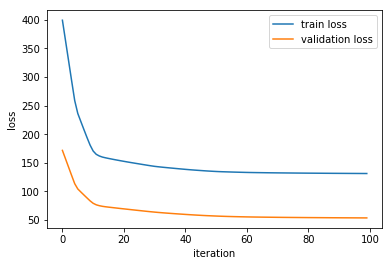

Final train loss is 131.219377065
Final validation loss is 53.548241848
Accuracy is 0.864734299517


In [6]:
# -*- coding: utf-8 -*-
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def get_data():
    data = load_svmlight_file("E:/Desktop/机器学习课程/实验/实验一/australian_scale.txt")
    return data[0], data[1]

def hinge_loss(x):
    return max(0, 1 - x)

#least squares loss
def loss_function(X, y, param, C):
    return (param ** 2).sum() / 2 + C * sum(map(hinge_loss, y * (np.dot(X, param))))

def gradient(X, y, param, C):
    temp = np.zeros(len(param))
    for i in range(X.shape[0]):
        if y[i] * np.dot(X[i,:], param) < 1:
            temp += -y[i] * X[i,:]
    return param + C * temp
    

#读取实验数据
X, y = get_data()
X = X.toarray()

#在训练集前添加一列1
X = np.c_[np.ones(len(X)), X]

#数据集切分
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#参数初始化
param = np.zeros(X_train.shape[1])
C = 0.9
#学习率
l_rate = 0.0002

train_loss = []
validation_loss = []
iteration_num = 100
for i in range(iteration_num):
    #求梯度
    G = gradient(X_train, y_train, param, C)
    
    #更新参数
    param = param - l_rate * G
    train_loss.append(loss_function(X_train, y_train, param, C))
    validation_loss.append(loss_function(X_test, y_test, param, C))
    
#画图
plt.plot(range(iteration_num),train_loss, label='train loss')
plt.plot(range(iteration_num),validation_loss, label='validation loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()
print("Final train loss is", train_loss[-1])
print("Final validation loss is", validation_loss[-1])

threshold = 0
predict = np.dot(X_test, param)
predict = list(map(lambda x : 1 if x >= threshold else -1, predict))
accuracy = (predict == y_test).sum() / y_test.size
print("Accuracy is", accuracy)